In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.misc

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [4]:
learning_rate = 0.001
training_epoch = 40
batch_size = 100
n_hidden = 256  # the number of neurons in hidden layer
n_input=784 #흑백은 1차원
ksize=5
knum=32 ########################

# function of put_hole
# create the hole to given images
def put_hole(images):
    
    new_images = np.zeros(images.shape)
    
    for i in range(images.shape[0]):
        img = np.copy(images[i])

        x = np.random.randint(7,high=14)
        y = np.random.randint(7,high=14)
        img[x:x+7, y:y+7] = 0
        new_images[i] = img
        
    return new_images

In [6]:
############autoencoder

#---------------------------X변수, Y변수-------------------------------------------------------

X=tf.placeholder(tf.float32,[None,28,28,1])
print(X) #인코딩할 인풋

Y=tf.placeholder(tf.float32,[None,28,28,1])
print(Y) #디코딩한 결과

#--------------------------convolution-------------------------------------------------------

W1=tf.Variable(tf.random_normal([ksize,ksize,1,knum],stddev=0.01))
print(W1)
#[필터크기5,필터크기5, 원래디멘션수1, 필터겹수32]

L1=tf.nn.conv2d(X,W1,strides=[1,2,2,1],padding='SAME')
print(L1)
#[모든배치를볼것임,상하2칸,좌우2칸,커널은 건너띄지 않음]

L1=tf.nn.relu(L1)
print("convolution:")
print(L1)

#--------------------------encoder-----------------------------------------------------------

W_encode=tf.Variable(tf.random_normal([14*14*knum,n_hidden],stddev=0.01))

L2=tf.reshape(L1,[-1,14*14*knum])
print('convolution을 리세이프')
print(L2)

h=tf.matmul(L2,W_encode)
print("encoder")
print(h)
#최종 히든레이어 

#--------------------

#decoder
output_batch=tf.shape(X)[0]
print(output_batch)

deconv_shape=tf.stack([output_batch,28,28,1])
print(deconv_shape) #처음 input과 같게 맞춘다.

#---------------------------------decoder-----------------------------------------------------

W_decode=tf.Variable(tf.random_normal([n_hidden,14*14*knum]))
print(h)
L3=tf.matmul(h,W_decode)
print("decode:")
print(L3)

#----------------------------------convolution----------------------------------------------

W3=tf.Variable(tf.random_normal([ksize,ksize,1,knum]))

L3=tf.reshape(L3,[-1,14,14,knum])

decoder=tf.nn.conv2d_transpose(L3,W3,output_shape=deconv_shape,strides=[1,2,2,1],padding='SAME')

decoder=tf.nn.sigmoid(decoder)

print("convolution:")
print(decoder)

cost=tf.reduce_mean(tf.pow(Y-decoder,2))

optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 28, 28, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>
Tensor("Conv2D:0", shape=(?, 14, 14, 32), dtype=float32)
convolution:
Tensor("Relu:0", shape=(?, 14, 14, 32), dtype=float32)
convolution을 리세이프
Tensor("Reshape:0", shape=(?, 6272), dtype=float32)
encoder
Tensor("MatMul:0", shape=(?, 512), dtype=float32)
Tensor("strided_slice:0", shape=(), dtype=int32)
stack결과
Tensor("stack:0", shape=(4,), dtype=int32)
뭐야
Tensor("MatMul:0", shape=(?, 512), dtype=float32)
decode:
Tensor("MatMul_1:0", shape=(?, 6272), dtype=float32)
convolution:
Tensor("Sigmoid:0", shape=(?, ?, ?, ?), dtype=float32)


In [7]:
#mnist.train.next_batch(100)[0].shape #100,784 100장의 이미지, 784디멘션
#mnist.train.next_batch(100)[1].shape #100,10 100장의 이미지, 10디멘션 원핫 인코딩


In [8]:
# 학습하기 !!

total_batch = int(mnist.train.num_examples/batch_size)
for epoch in range(40):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs=batch_xs.reshape(-1,28,28,1)
        hole_images = put_hole(batch_xs.reshape(-1,28,28,1)) # create the hole. you can reshape the hole_images

    # TO DO:Implement to train part of the denoising autoencoder
        _,cost_val=sess.run([optimizer,cost],feed_dict={X:hole_images,Y:batch_xs})
        total_cost+=cost_val
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

Epoch: 0001 Avg. cost = 0.0208
Epoch: 0002 Avg. cost = 0.0091
Epoch: 0003 Avg. cost = 0.0075
Epoch: 0004 Avg. cost = 0.0068
Epoch: 0005 Avg. cost = 0.0064
Epoch: 0006 Avg. cost = 0.0062
Epoch: 0007 Avg. cost = 0.0060
Epoch: 0008 Avg. cost = 0.0059
Epoch: 0009 Avg. cost = 0.0058
Epoch: 0010 Avg. cost = 0.0057
Epoch: 0011 Avg. cost = 0.0056
Epoch: 0012 Avg. cost = 0.0056
Epoch: 0013 Avg. cost = 0.0055
Epoch: 0014 Avg. cost = 0.0054
Epoch: 0015 Avg. cost = 0.0054
Epoch: 0016 Avg. cost = 0.0053
Epoch: 0017 Avg. cost = 0.0052
Epoch: 0018 Avg. cost = 0.0052
Epoch: 0019 Avg. cost = 0.0051
Epoch: 0020 Avg. cost = 0.0051
Epoch: 0021 Avg. cost = 0.0050
Epoch: 0022 Avg. cost = 0.0050
Epoch: 0023 Avg. cost = 0.0049
Epoch: 0024 Avg. cost = 0.0049
Epoch: 0025 Avg. cost = 0.0049
Epoch: 0026 Avg. cost = 0.0048
Epoch: 0027 Avg. cost = 0.0048
Epoch: 0028 Avg. cost = 0.0048
Epoch: 0029 Avg. cost = 0.0047
Epoch: 0030 Avg. cost = 0.0047
Epoch: 0031 Avg. cost = 0.0047
Epoch: 0032 Avg. cost = 0.0047
Epoch: 0

input Images


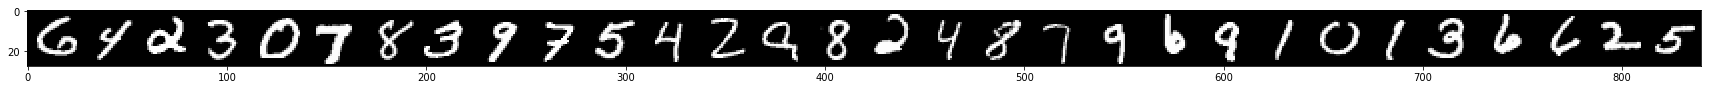

hole Images


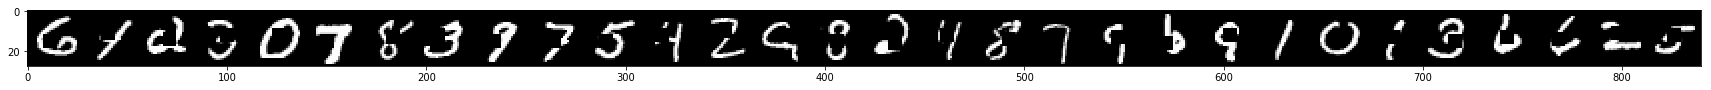

Reconstructed Images


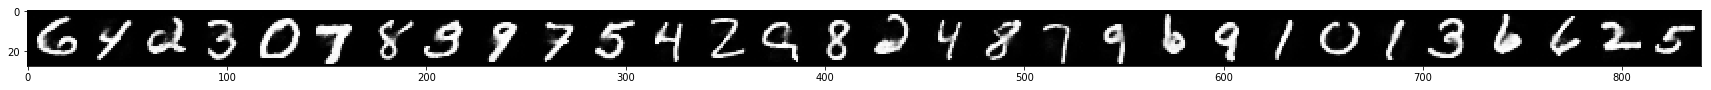

input Images


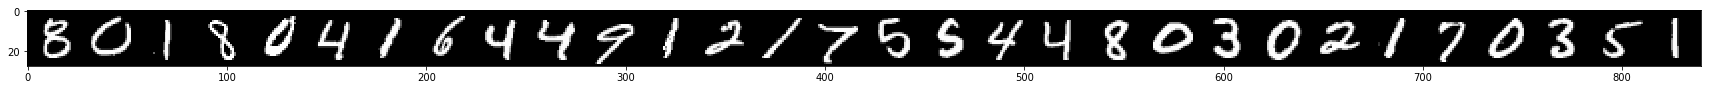

hole Images


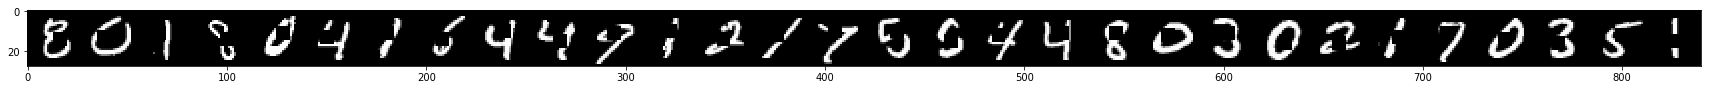

Reconstructed Images


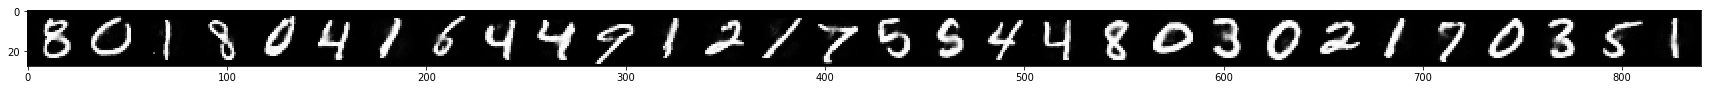

input Images


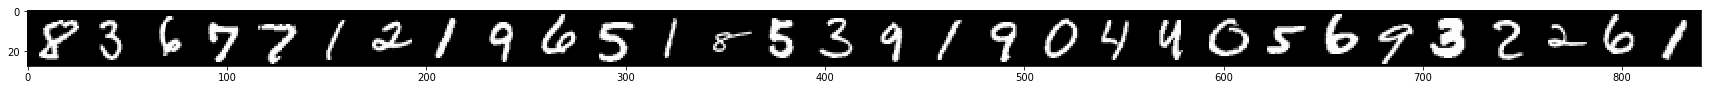

hole Images


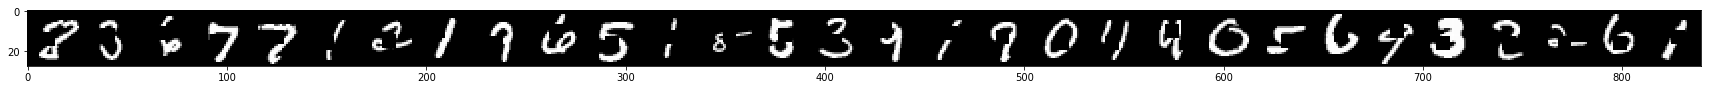

Reconstructed Images


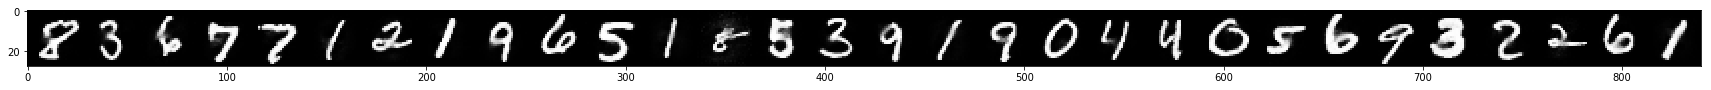

In [9]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 30
canvas_input = np.empty((28, 28 * n))
canvas_hole = np.empty((28, 28 * n))
canvas_recon = np.empty((28, 28 * n))
for j in range(3):
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(100)
        input_image = batch_x
        hole_images = put_hole(batch_x.reshape(-1,28,28,1)) #create the holes
        # TO DO: Implement to fill the hole images, you can reshape the hole_images
    
        
        # You can reshape the hole_images to fit the shape of the placeholder X
        # define the decoder in the decoder part
        g = sess.run(decoder, feed_dict={X: hole_images}) #구멍 뚫린 이미지들. 

        canvas_input[0:28, i * 28:(i + 1) * 28] = input_image[i].reshape([28, 28])
        canvas_hole[0:28, i * 28:(i + 1) * 28] = hole_images[i].reshape([28, 28])
        canvas_recon[0:28, i * 28:(i + 1) * 28] = g[i].reshape([28, 28])

    print("input Images")     
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_input, origin="upper", cmap="gray")
    plt.show()

    print("hole Images")     
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_hole, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

    out_image = np.concatenate((canvas_input,canvas_hole,canvas_recon ), axis=0)
    plt.imsave('result{0}.png'.format(j), out_image, cmap="gray")